<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [5]:
sac_csv = '../data/sacramento_real_estate_transactions.csv'

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [27]:
sac = pd.read_csv(sac_csv)
sac.sample(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
281,993 MANTON CT,GALT,95632,CA,4,3,2307,Residential,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
390,10001 WOODCREEK OAKS BLVD Unit 1415,ROSEVILLE,95747,CA,2,2,0,Condo,Mon May 19 00:00:00 EDT 2008,150000,38.795529,-121.328819
256,419 DAWNRIDGE RD,ROSEVILLE,95678,CA,3,2,1498,Residential,Tue May 20 00:00:00 EDT 2008,250000,38.725283,-121.297953
167,7607 ELDER CREEK RD,SACRAMENTO,95824,CA,3,1,924,Residential,Tue May 20 00:00:00 EDT 2008,92000,38.510550,-121.414768


In [28]:
sac[sac.latitude < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


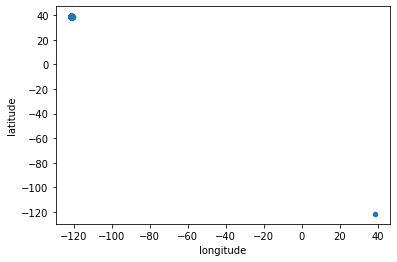

In [29]:
sac.plot.scatter(x='longitude', y='latitude')

In [30]:
#sac = sac[sac.latitude > 0]

In [31]:
latitude_temp = sac.loc[703, 'longitude']
sac.loc[703, 'longitude'] = sac.loc[703, 'latitude']
sac.loc[703, 'latitude'] = latitude_temp
sac.loc[703, 'price'] = - sac.loc[703, 'price']
sac.loc[703, 'sq__ft'] = - sac.loc[703, 'sq__ft']
sac.loc[703, 'state'] = 'CA'

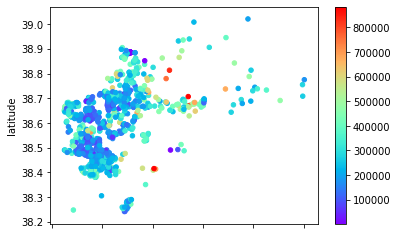

In [32]:
sac.plot.scatter(x='longitude', y='latitude',
                c=sac.price, cmap='rainbow')

In [33]:
sac[sac.price < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [34]:
sac.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [36]:
sac['empty_lot'] = (sac.beds == 0) & (sac.baths == 0) & (sac.sq__ft == 0)

In [40]:
sac[~sac.empty_lot & (sac.sq__ft == 0)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot
132,3020 RICHARDSON CIR,EL DORADO HILLS,95762,CA,3,2,0,Residential,Wed May 21 00:00:00 EDT 2008,352000,38.691299,-121.081752,False
154,6030 PALERMO WAY,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,600000,38.672761,-121.050378,False
155,4070 REDONDO DR,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,606238,38.666807,-121.064830,False
157,315 JUMEL CT,EL DORADO HILLS,95762,CA,6,5,0,Residential,Wed May 21 00:00:00 EDT 2008,830000,38.669931,-121.059580,False
223,2778 KAWEAH CT,CAMERON PARK,95682,CA,3,1,0,Residential,Tue May 20 00:00:00 EDT 2008,201000,38.694052,-120.995589,False
224,1636 ALLENWOOD CIR,LINCOLN,95648,CA,4,2,0,Residential,Tue May 20 00:00:00 EDT 2008,202500,38.879192,-121.309477,False
227,2370 BIG CANYON CREEK RD,PLACERVILLE,95667,CA,3,2,0,Residential,Tue May 20 00:00:00 EDT 2008,205000,38.744580,-120.794254,False
230,3361 BOW MAR CT,CAMERON PARK,95682,CA,2,2,0,Residential,Tue May 20 00:00:00 EDT 2008,210000,38.694370,-120.996602,False
262,632 NEWBRIDGE LN,LINCOLN,95648,CA,4,2,0,Residential,Tue May 20 00:00:00 EDT 2008,261800,38.879084,-121.298586,False
278,1102 CHESLEY LN,LINCOLN,95648,CA,4,4,0,Residential,Tue May 20 00:00:00 EDT 2008,297500,38.864864,-121.313988,False


In [38]:
sac[~sac.empty_lot].describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,95757.114025,3.270239,1.995439,1476.844926,239877.896237,38.590680,-121.362142
std,84.820726,0.864675,0.680771,760.257110,130165.212763,0.132885,0.137115
min,95603.000000,1.000000,1.000000,0.000000,1551.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1093.000000,150000.000000,38.477568,-121.448283
50%,95815.000000,3.000000,2.000000,1373.000000,215000.000000,38.618019,-121.386962
75%,95828.000000,4.000000,2.000000,1800.000000,297500.000000,38.684790,-121.310667
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


In [41]:
real_houses = sac[~sac.empty_lot & (sac.sq__ft > 0)].copy()

In [42]:
real_houses.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,814.0000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,95761.4914,3.244472,1.960688,1591.146192,229448.369779,38.577044,-121.378687
std,85.3440,0.852137,0.669804,663.841930,119825.576060,0.126315,0.119736
min,95603.0000,1.000000,1.000000,484.000000,2000.000000,38.241514,-121.550527
25%,95670.0000,3.000000,2.000000,1144.000000,148750.000000,38.473885,-121.451501
50%,95820.0000,3.000000,2.000000,1418.500000,207986.500000,38.591720,-121.405456
75%,95828.0000,4.000000,2.000000,1851.000000,284973.250000,38.674705,-121.325844
max,95864.0000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


In [44]:
# Sloughhouse is probably just a barn, $2000; 3 bedrooms in 
# Citrus Heights for $30,000 doesn't look right either...

In [45]:
real_houses = real_houses[real_houses.price >= 40000]

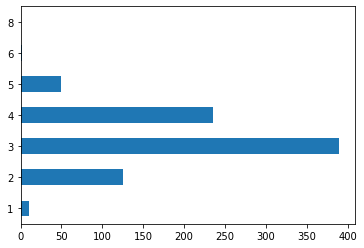

In [48]:
real_houses.beds.value_counts().sort_index().plot.barh()

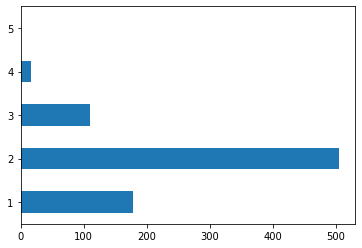

In [49]:
real_houses.baths.value_counts().sort_index().plot.barh()

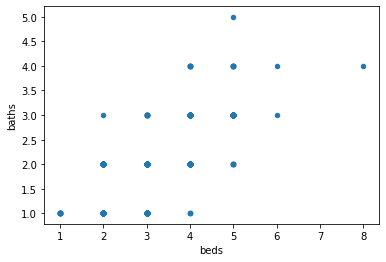

In [50]:
real_houses.plot.scatter(x='beds', y='baths')

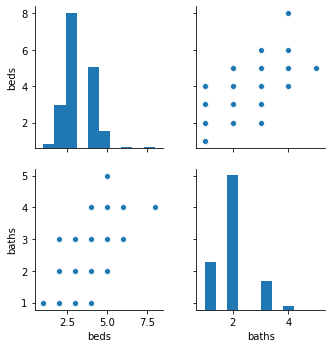

In [51]:
sns.pairplot(real_houses[['beds', 'baths']])

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning

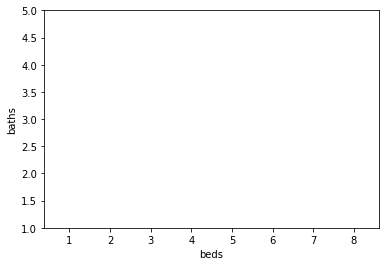

In [54]:
sns.kdeplot(data=real_houses.beds, data2=real_houses.baths)

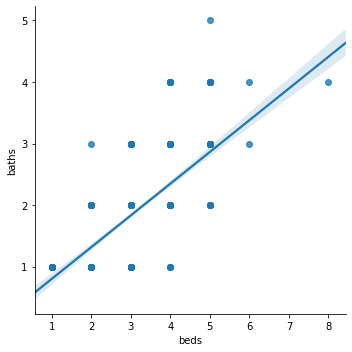

In [55]:
sns.lmplot(data=real_houses, x='beds', y='baths')

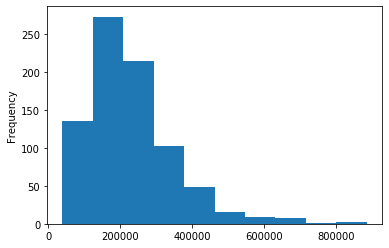

In [56]:
real_houses.price.plot.hist()

D:\Users\gregb\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


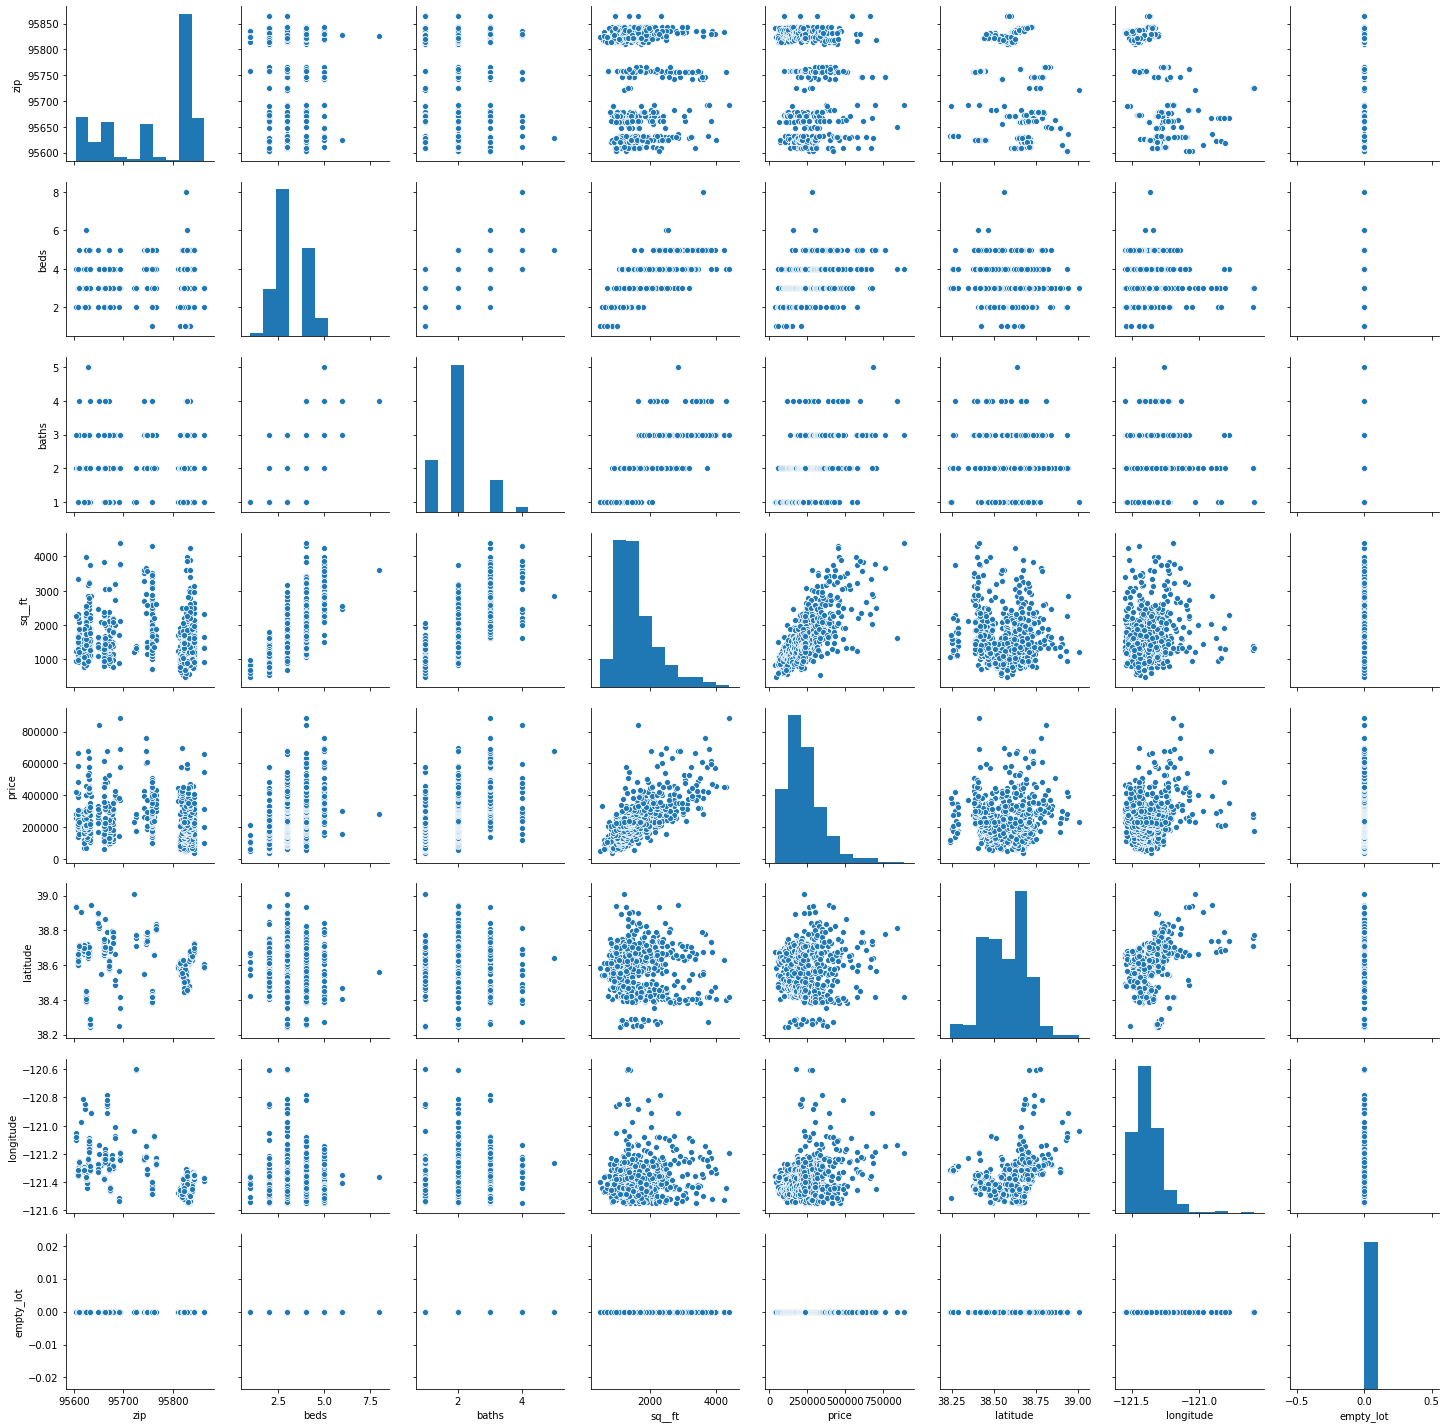

In [57]:
sns.pairplot(real_houses)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [58]:
feature_cols = ['sq__ft', 'beds', 'baths']

In [ ]:
fields = sklearn.model_selection.train_test_split(
    real_houses[feature_cols],
    real_houses.price
)
Xtrain = fields[0]
Xtest = fields[1]
Ytrain = fields[2]
Ytest = fields[3]

In [69]:
import sklearn.model_selection
Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
    real_houses[feature_cols],
    real_houses.price
)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((609, 3), (203, 3), (609,), (203,))

In [70]:
import sklearn.linear_model
ols = sklearn.linear_model.LinearRegression()
ols.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
ols.intercept_, ols.coef_

(71849.74957006611, array([   151.48073287, -25129.59897182,    195.12357362]))

price = 51041 + 148.5 * sqft -21422 * beds + 7611 * baths

price = 71850 + 151 * sqft - 25129 * bed + 195 * baths

In [63]:
predictions = ols.predict(Xtest)

Text(0, 0.5, 'Prediction')

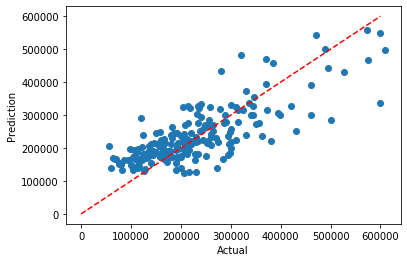

In [67]:
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")

In [74]:
import sklearn.metrics

print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))

86062.13911706553
114330.6807604076
-0.4230514447153888


82862.4564860427
94659.47644931934
-0.004565618794218684


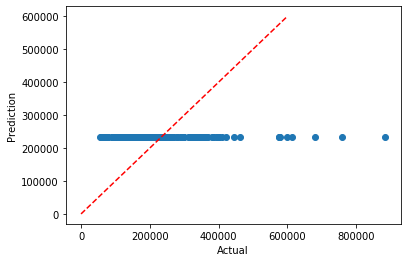

In [77]:
import sklearn.dummy
dummy = sklearn.dummy.DummyRegressor()
dummy.fit(Xtrain, Ytrain)
predictions = dummy.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))

47916.619799219916
58562.407355477335
0.6345408466853069
71847.53727575511 [   151.48142279 -25125.30882205    188.63748072]


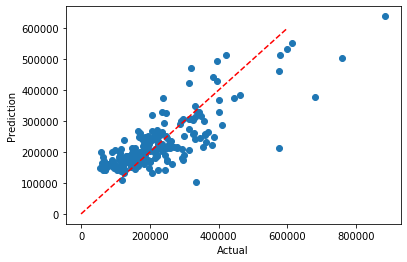

In [79]:
lasso = sklearn.linear_model.Lasso()
lasso.fit(Xtrain, Ytrain)
predictions = lasso.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(lasso.intercept_, lasso.coef_)

41316.13250041418
54802.59192282289
0.6521321249745224
18462.70898808305 [   161.28434383 -16357.57695579   1781.37189036]


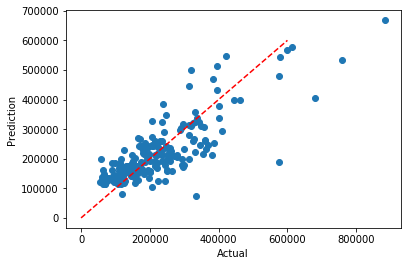

In [80]:
ts = sklearn.linear_model.TheilSenRegressor()
ts.fit(Xtrain, Ytrain)
predictions = ts.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(ts.intercept_, ts.coef_)

44446.54445056553
58866.42204847082
0.5915825155081293
75992.7129207868 [   165.70115321 -28766.45458327 -19894.65122856]


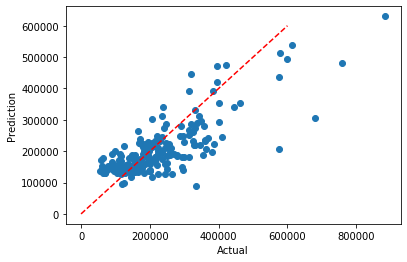

In [81]:
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(Xtrain, Ytrain)
predictions = ransac.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(ransac.estimator_.intercept_, ransac.estimator_.coef_)

44176.17268146979
56825.24694952154
0.6311272882306945
51745.201061054926 [   139.95926419 -21632.15782947   7857.53263784]


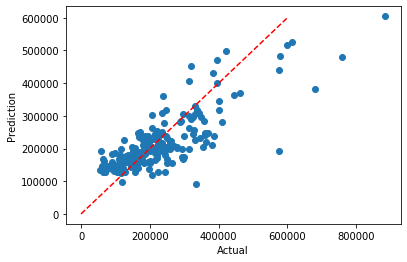

In [82]:
huber = sklearn.linear_model.HuberRegressor()
huber.fit(Xtrain, Ytrain)
predictions = huber.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(huber.intercept_, huber.coef_)

In [85]:
Xtest[Ytest - predictions > 200000]

,sq__ft,beds,baths
553,3670,5,3
292,539,2,1
332,2846,5,5
864,4400,4,3
853,1252,2,1


In [86]:
real_houses[real_houses.index.isin(
         Xtest[Ytest - predictions > 200000].index)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot
292,5411 10TH AVE,SACRAMENTO,95820,CA,2,1,539,Residential,Tue May 20 00:00:00 EDT 2008,334000,38.542727,-121.442449,False
332,4128 HILL ST,FAIR OAKS,95628,CA,5,5,2846,Residential,Tue May 20 00:00:00 EDT 2008,680000,38.641670,-121.262099,False
553,6222 CALLE MONTALVO CIR,GRANITE BAY,95746,CA,5,3,3670,Residential,Mon May 19 00:00:00 EDT 2008,760000,38.779435,-121.146676,False
853,1165 37TH ST,SACRAMENTO,95816,CA,2,1,1252,Residential,Fri May 16 00:00:00 EDT 2008,575000,38.568438,-121.457854,False
864,9401 BARREL RACER CT,WILTON,95693,CA,4,3,4400,Residential,Fri May 16 00:00:00 EDT 2008,884790,38.415298,-121.194858,False


In [87]:
real_houses['sprawling_mansion'] = (
    (real_houses.beds > 4) & (real_houses.baths > 2)
)

In [ ]:
# look up income on wikipedia / US census?
# distance to downtown
# bucket zip codes based on average price

44382.9691335785
55284.40551403965
0.4546483076102976
0.0782376996968137 [1.36767114e+02 2.57616552e-01 1.69199310e-01 1.16016721e-03]


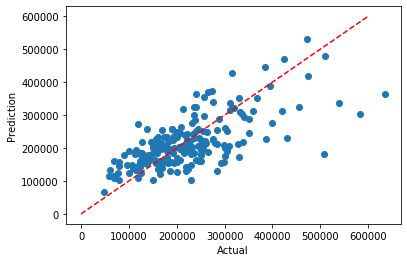

In [90]:
Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
    real_houses[['sq__ft', 'beds', 'baths', 'sprawling_mansion']],
    real_houses.price
)
huber = sklearn.linear_model.HuberRegressor()
huber.fit(Xtrain, Ytrain)
predictions = huber.predict(Xtest)
(fig, axis) = plt.subplots()
axis.scatter(Ytest, predictions)
axis.plot([0, 600000], [0, 600000], linestyle="--", c="red"
         )
axis.set_xlabel("Actual")
axis.set_ylabel("Prediction")
print(sklearn.metrics.median_absolute_error(Ytest, predictions))
print(sklearn.metrics.mean_absolute_error(Ytest, predictions))
print(sklearn.metrics.r2_score(Ytest, predictions))
print(huber.intercept_, huber.coef_)

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [6]:
# A:

### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A: